In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import datetime as dt
import pandasql as ps

In [2]:
#Orders info
Orders = pd.read_csv('olist_orders_dataset.csv')
Orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
#Customer Info
Customers = pd.read_csv('olist_orders_dataset.csv')
Customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
Payments = pd.read_csv('olist_order_payments_dataset.csv')
Payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
inner_join = pd.merge(Orders, Customers, on = 'order_id', how = 'inner')
inner_join.head()
inner_join.shape

(99441, 15)

In [5]:
Payments['US'] = Payments['payment_value'] * 0.24
Payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,US
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,23.8392
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,5.8536
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,15.7704
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,25.8672
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,30.8280


In [6]:
Reviews = pd.read_csv('olist_order_reviews_dataset.csv')
Reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
Customers.shape

(99441, 8)

In [8]:
Items = pd.read_csv("olist_order_items_dataset.csv")
Items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
Reviews.shape
Reviews.isnull()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,False,False,False,True,True,False,False
1,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
99995,False,False,False,True,True,False,False
99996,False,False,False,True,False,False,False
99997,False,False,False,True,True,False,False
99998,False,False,False,True,False,False,False


ax = sns.countplot(x = 'payment_type', data = Payments)

In [10]:
Purchased =   pd.merge(Orders, Payments, on = 'order_id', how = 'inner')
Purchased.head()
Purchased.shape

(103886, 13)

Purchased in a merged dataframe that gives customer and payment information


In [11]:
Purchased_I =   pd.merge(Purchased, Items, on = 'order_id', how = 'inner')
Purchased_I.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,US,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,4.3488,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,0.4800,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,4.4616,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,33.9504,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,42.9888,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [12]:
Purchased_I =   pd.merge(Purchased_I, Reviews, on = 'order_id', how = 'inner')
Purchased_I.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [ ]:
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)


In [ ]:
Purchased_I is a ,merged dataset that includes the items ordered by each customer

In [13]:
pysqldf = lambda q: sqldf(q, globals())

In [14]:
q1 = "SELECT   count(customer_id) FROM Purchased_I group by customer_id;"
Purchased_I['bought'] = ps.sqldf(q1,locals())
Purchased_I.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,bought
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0


In [15]:
q2 = "SELECT * FROM Purchased_I WHERE bought = 1;"
Single = ps.sqldf(q2,locals())
Single.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,bought
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,None,None,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0


In [16]:
q4 = "SELECT * FROM Purchased_I WHERE bought != 1;"
Serial = ps.sqldf(q4,locals())
Serial.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,bought
0,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,1,credit_card,...,2017-08-11 12:05:32,149.99,19.77,abc5655186d40772bd6e410420e6a3ed,5,None,None,2017-08-17 00:00:00,2017-08-18 01:47:32,4.0
1,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,1,credit_card,...,2017-07-19 20:10:08,98.00,16.13,a932e1fddc0c17fc26de56687b48f922,4,None,None,2017-07-20 00:00:00,2017-07-22 20:11:54,2.0
2,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,1,boleto,...,2018-06-18 03:13:12,31.90,18.23,ed220e853e96b629118a3576e02900b6,5,None,None,2018-06-20 00:00:00,2018-06-20 15:31:29,4.0
3,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11 00:00:00,1,credit_card,...,2017-11-29 00:14:22,17.90,11.85,70c498f6918af37d6444d7846449ea5b,5,None,None,2017-11-28 00:00:00,2017-11-28 22:12:02,3.0
4,2807d0e504d6d4894d41672727bc139f,72ae281627a6102d9b3718528b420f8a,delivered,2018-02-03 20:37:35,2018-02-03 20:50:22,2018-02-05 22:37:28,2018-02-08 16:13:46,2018-02-21 00:00:00,1,credit_card,...,2018-02-08 20:50:22,9.50,7.78,e905f4e4e372b175115c1d6c878b5020,3,None,None,2018-02-09 00:00:00,2018-02-11 21:45:20,2.0


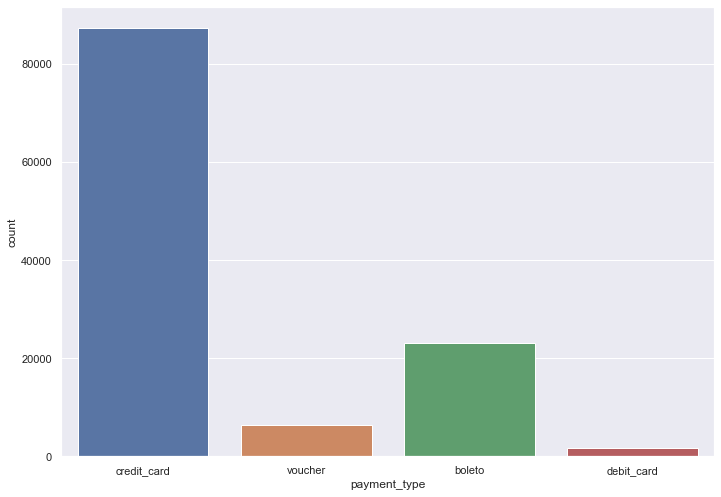

In [60]:
sns.countplot(x = 'payment_type', data = Purchased_I)

In [61]:
pd.value_counts(Purchased_I['payment_type'].values)


credit_card    87266
boleto         23018
voucher         6332
debit_card      1699
dtype: int64

ax = sns.countplot(x = 'payment_type', data = Single)

In [ ]:
Purchase_I.to_csv(, encoding='utf-8', index=False)

In [20]:
pd.value_counts(Single['payment_type'].values)


credit_card    63233
boleto         16709
voucher         4532
debit_card      1265
dtype: int64

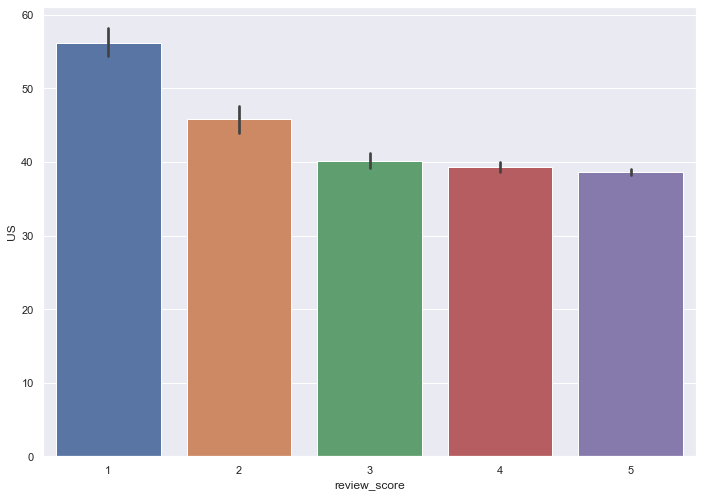

In [74]:
sns.barplot(x = 'review_score', y = 'US',  data = Purchased_I)

In [85]:
sns.countplot(x = 'review_score', hue = 'payment_method',  data = Purchased_I)

ValueError: Could not interpret input 'payment_method'

In [75]:
pd.value_counts(Purchased_I['review_score'].values)

5    66370
4    22352
1    15427
3     9965
2     4201
dtype: int64

In [86]:
sns.boxplot(x = 'review_score', y = 'payment_amount',  data = Purchased_I)

ValueError: Could not interpret input 'payment_amount'

TypeError: boxplot() got multiple values for keyword argument 'widths'

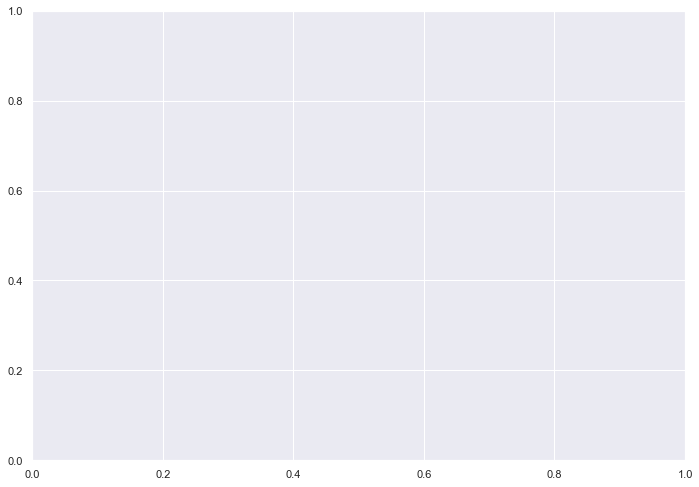

In [35]:
plt.boxplot()

ValueError: cannot convert float NaN to integer

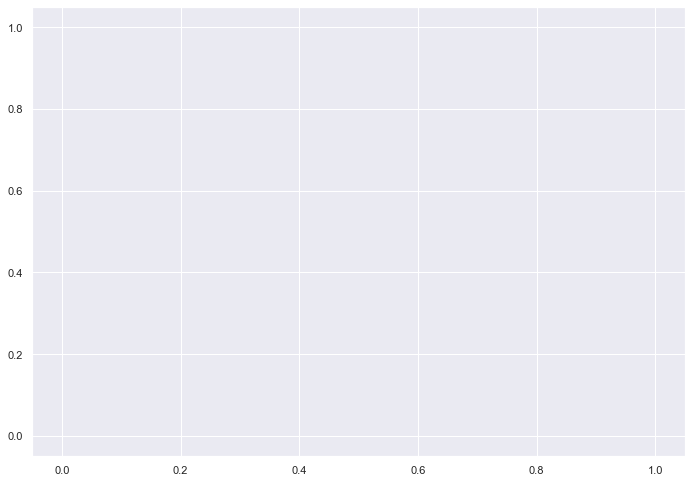

In [69]:
sns.distplot(Purchased_I['bought'], kde = False)

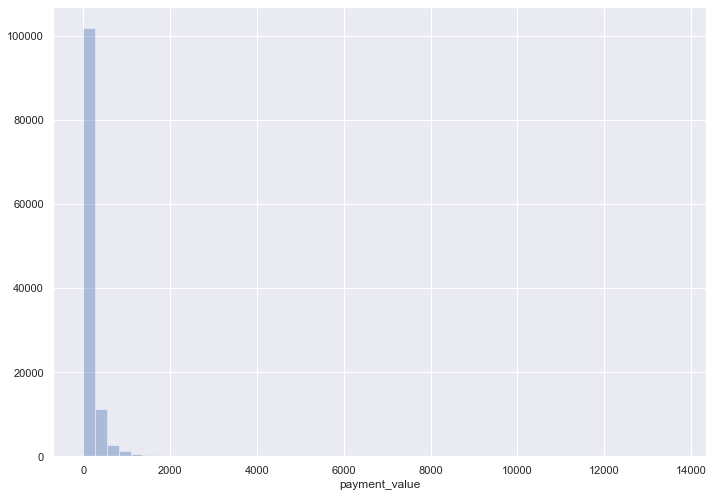

In [52]:
sns.distplot(Purchased_I["payment_value"], kde = False)

In [53]:
Purchased_I['payment_value'].mean()

172.57565101635464

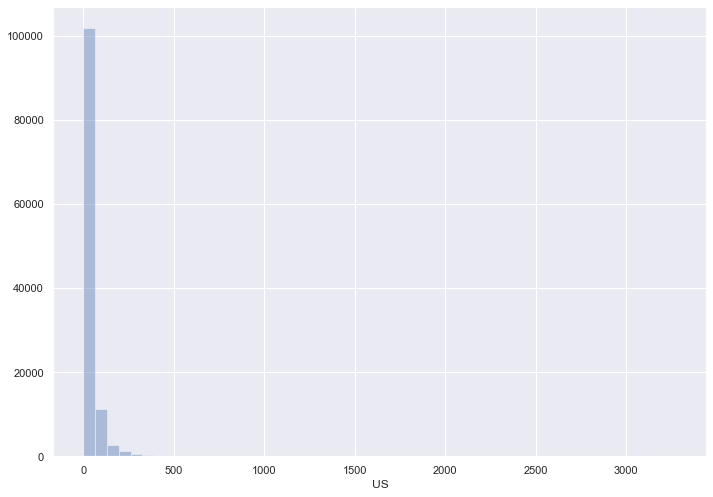

In [55]:
sns.distplot(Purchased_I["US"], kde = False)

In [56]:
Purchased_I['US'].mean()

41.41815624392511

In [82]:
Purchased_I['US'].max()

3279.3792

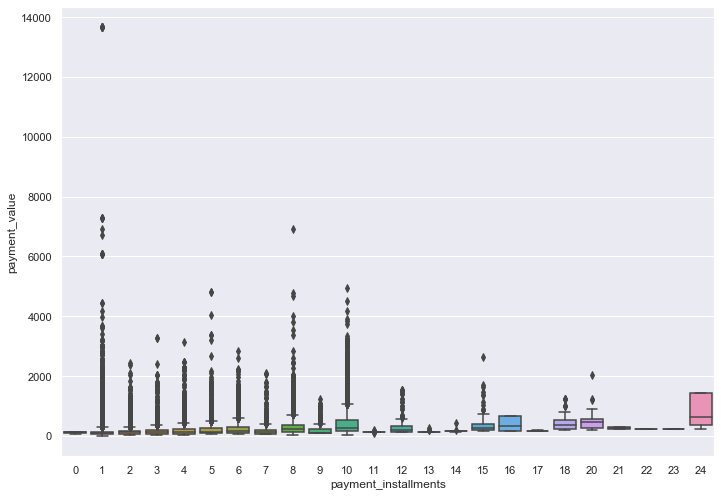

In [80]:
sns.boxplot( x ='payment_installments',  y = 'payment_value', data = Purchased_I)

For people who have only made one order, they bought mostly with credit cards, 
spending less than 500 US and less than 2,000 brazillian real

In [17]:
pd.value_counts(Purchased_I['customer_id'].values)


270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
6ee2f17e3b6c33d6a9557f280edd2925    24
                                    ..
08112656aac7e7f6f51324b2f1d85f02     1
d2bec02f98c0a59bdec9baaf22cf91b7     1
5df2ff723d34c14ec65ed6d176c45eab     1
f4fdaa7dd25d23ceb2b4d11491c09c67     1
47fd93db3f6e715f6d06f90ba501b94d     1
Length: 98665, dtype: int64

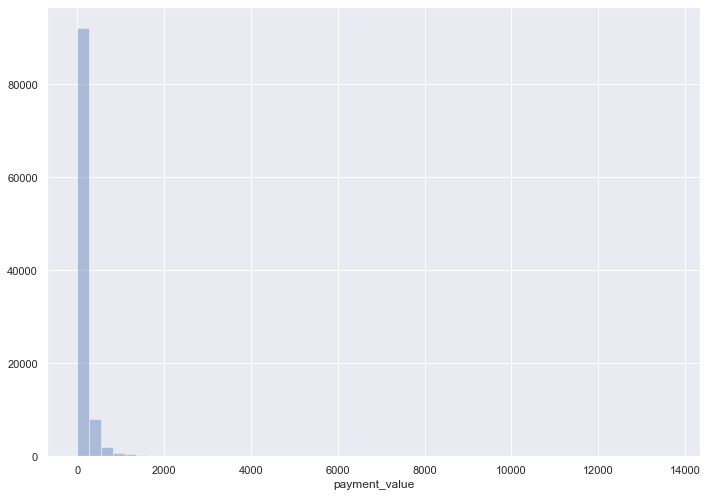

In [9]:
sns.distplot(Payments["payment_value"], kde = False)

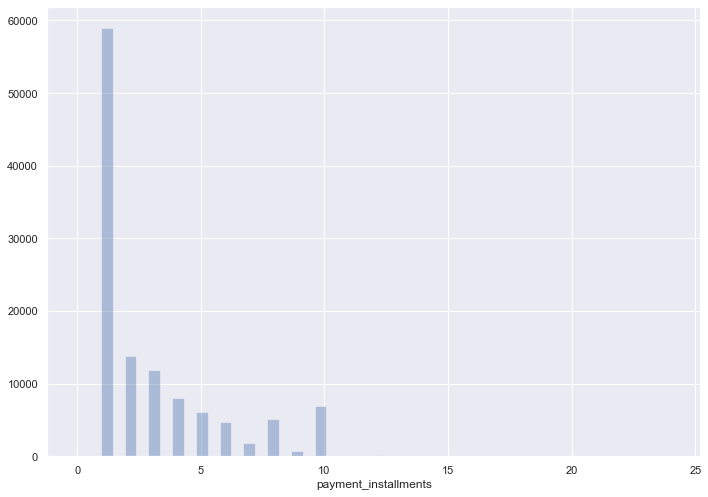

In [70]:
sns.distplot(Purchased_I["payment_installments"], kde = False)


sns.scatterplot(x = 'payment_installments', y = 'payment_value', hue = 'payment_type',  data = Serial)

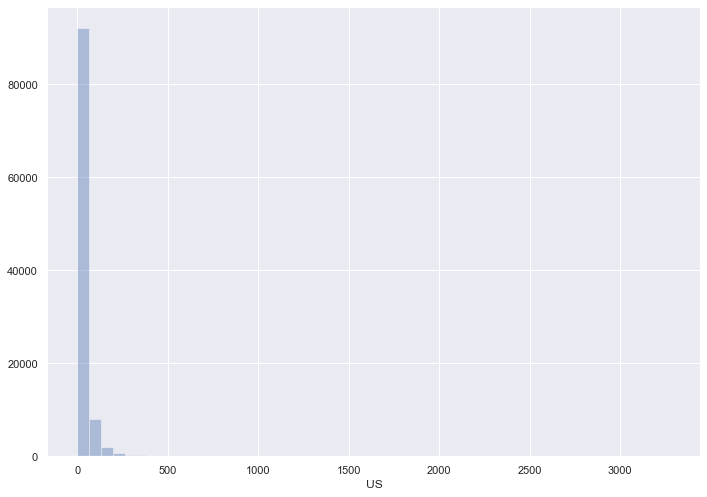

In [24]:
sns.distplot(Payments["US"], kde = False)

In [41]:
q3 = "SELECT * FROM Single WHERE payment_type = 'credit_card';"
CC = ps.sqldf(q3,locals())
CC.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,US,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,bought
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,4.3488,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,42.9888,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,credit_card,1,72.20,17.3280,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1.0
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,1,28.62,6.8688,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1.0
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1,credit_card,6,175.26,42.0624,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,1.0


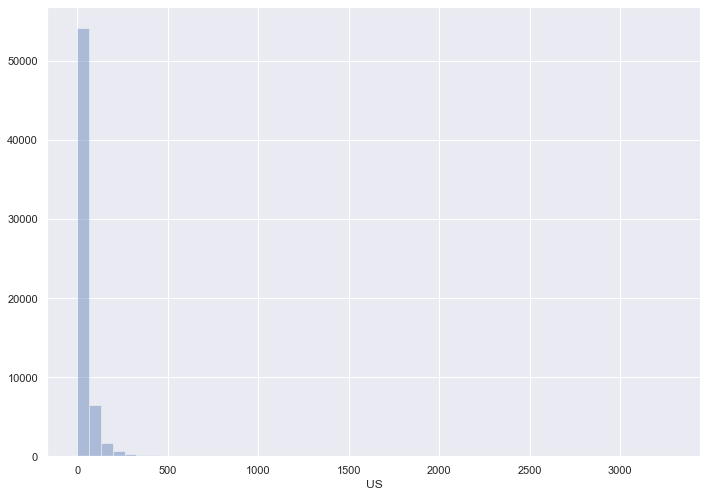

In [43]:
sns.distplot(CC["US"], kde = False)

formula = 'payment_value ~  C(payment_type) + payment_installments' 
fitted_model = smf.ols(formula=formula, data= Purchased_I).fit()
fitted_model.summary()

In [41]:
formula = 'payment_value ~ C(payment_type) + payment_installments + C(review_score)' 
fitted_model = smf.ols(formula=formula, data= Purchased_I).fit() 
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1542.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:46:40   Log-Likelihood:            -8.2311e+05
No. Observations:              118315   AIC:                         1.646e+06
Df Residuals:                  118306   BIC:                         1.646e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        200.6067      2.568     78.111      0.000     195.573     205.640
C(payment_type)[T.credit_card]   -75.0909      2.036    -36.887      0.000     -79.081     -71.101
C(payment_type)[T.debit_card]    -25.9896      6.391     -4.067      0.000     -38.515     -13.464
C(payment_type)[T.voucher]      -112.9942      3.607    -31.324      0.000    -120.064    -105.924
C(review_score)[T.2]             -39.0838      4.424     -8.835      0.000     -47.754     -30.413
C(review_score)[T.3]             -59.2432      3.268    -18.130      0.000     -65.648     -52.839
C(review_score)[T.4]             -57.6548      2.664    -21.644      0.000     -62.876     -52.434
C(review_score)[T.5]             -62.8563      2.274    -27.635      0.000     -67.314     -58.398
payment_installments              29.3202      0.293    100.016      0.000      28.746      29.895
==============================================================================
Omnibus:                   234745.198   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1874177422.003
Skew:                          15.651   Prob(JB):                         0.00
Kurtosis:                     618.787   Cond. No.                         36.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
formula = 'payment_value ~  C(payment_type) + payment_installments + review_score' 
fitted_model = smf.ols(formula=formula, data= Serial).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.58e-313
Time:                        20:47:33   Log-Likelihood:                -89005.
No. Observations:               12926   AIC:                         1.780e+05
Df Residuals:                   12920   BIC:                         1.781e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        184.2974      7.673     24.018      0.000     169.257     199.338
C(payment_type)[T.credit_card]   -77.2999      5.703    -13.554      0.000     -88.479     -66.121
C(payment_type)[T.debit_card]    -39.0590     18.119     -2.156      0.031     -74.575      -3.543
C(payment_type)[T.voucher]      -109.1895     10.283    -10.619      0.000    -129.345     -89.034
payment_installments              30.0956      0.820     36.690      0.000      28.488      31.703
review_score                      -9.5418      1.493     -6.391      0.000     -12.468      -6.615
==============================================================================
Omnibus:                    19269.740   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15409625.239
Skew:                           8.913   Prob(JB):                         0.00
Kurtosis:                     171.207   Cond. No.                         48.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
formula = 'payment_value ~  C(payment_type) + payment_installments + review_score' 
fitted_model = smf.ols(formula=formula, data= Single).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1653.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:48:10   Log-Likelihood:            -5.9920e+05
No. Observations:               85739   AIC:                         1.198e+06
Df Residuals:                   85733   BIC:                         1.198e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        201.1162      3.307     60.811      0.000     194.634     207.598
C(payment_type)[T.credit_card]   -74.3352      2.467    -30.126      0.000     -79.171     -69.499
C(payment_type)[T.debit_card]    -24.1438      7.651     -3.156      0.002     -39.140      -9.147
C(payment_type)[T.voucher]      -114.2830      4.394    -26.008      0.000    -122.896    -105.671
payment_installments              29.3700      0.356     82.430      0.000      28.672      30.068
review_score                     -13.4349      0.641    -20.951      0.000     -14.692     -12.178
==============================================================================
Omnibus:                   180310.891   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1902922845.538
Skew:                          17.893   Prob(JB):                         0.00
Kurtosis:                     731.961   Cond. No.                         47.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
Orders.isnull().sum().sum()

4908

In [13]:
Orders =Orders.dropna()

In [14]:
Orders.isnull().sum().sum()

0

In [15]:
full_cust = pd.merge(inner_join, Payments, on = 'order_id', how = 'inner')
full_cust.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [16]:
formula = 'payment_value ~ C(payment_type)+ payment_installments' 
fitted_model = smf.ols(formula=formula, data= full_cust).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2838.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:12:09   Log-Likelihood:            -6.9989e+05
No. Observations:              103886   AIC:                         1.400e+06
Df Residuals:                  103880   BIC:                         1.400e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        115.7016      1.473     78.536      0.000     112.814     118.589
C(payment_type)[T.credit_card]   -55.2573      1.751    -31.564      0.000     -58.689     -51.826
C(payment_type)[T.debit_card]     -2.4643      5.415     -0.455      0.649     -13.078       8.149
C(payment_type)[T.not_defined]  -145.0344    117.795     -1.231      0.218    -375.910      85.841
C(payment_type)[T.voucher]       -79.3311      3.051    -25.999      0.000     -85.312     -73.350
payment_installments              29.3328      0.258    113.595      0.000      28.827      29.839
==============================================================================
Omnibus:                   167664.956   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        402350880.379
Skew:                          10.125   Prob(JB):                         0.00
Kurtosis:                     307.207   Cond. No.                         753.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
Reviews = pd.read_csv('olist_order_reviews_dataset.csv')
Reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
Orders['order_purchase_timestamp']= pd.to_datetime(Orders['order_purchase_timestamp'])

In [19]:
import pandasql as ps
q1 = "SELECT * FROM Orders Where order_purchase_timestamp between '2017-11-24'  and '2017-11-28' group by order_purchase_timestamp;"
NOrders = ps.sqldf(q1,locals())
NOrders.shape

(2380, 8)

Orders['order_purchase_timestamp'] = pd.to_datetime(Orders['order_purchase_timestamp'], infer_datetime_format=True)

In [20]:
Info = pd.merge(Orders, Payments, on = 'order_id', how = 'inner')
Info.head(10)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,credit_card,1,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,1,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1,credit_card,6,175.26
8,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,credit_card,3,75.16
9,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1,boleto,1,35.95


C:\Users\kerrs\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


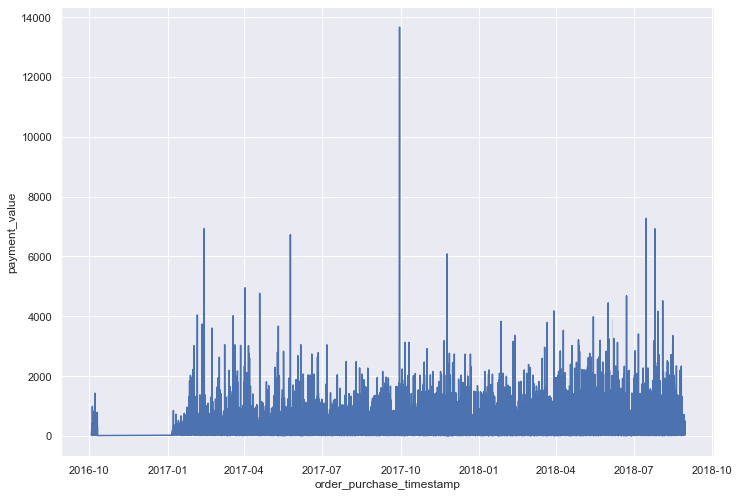

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
sns.lineplot(x="order_purchase_timestamp", y = 'payment_value', data=Info)

In [22]:
Info['payment_value'].max()

13664.08